# From Scratch Decision Tree

In [63]:
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [56]:
# importing the datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

 **Iris datasets**

In [57]:
iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)

In [58]:
# train our tree on 75% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (112, 4)
Test Shape: (38, 4)


In [62]:
my_tree = DecisionTree(max_depth=10, min_samples_split=2)
my_tree.fit(X_train, y_train)
print(my_tree)

In [33]:
# lets see the train performace
train_pred = my_tree.predict(X_train)
print("Train Performance")
print("Train size",len(y_train))
print("True preds", sum(train_pred==y_train))
print("Accuracy", sum(train_pred==y_train)/len(y_train))

Train Performance
Train size 112
True preds 112
Accuracy 1.0


In [35]:
# lets see the test performance
test_pred = my_tree.predict(X_test)
print("Test Performance")
print("Test size",len(y_test))
print("True preds", sum(test_pred==y_test))
print("Accuracy", sum(test_pred==y_test)/len(y_test))

Test Performance
Test size 38
True preds 36
Accuracy 0.9473684210526315


**Breast Cancer Dataset**

In [66]:
data = datasets.load_breast_cancer()
X = np.array(data.data)
y = np.array(data.target)

In [67]:
# train our tree on 70% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (398, 30)
Test Shape: (171, 30)


In [68]:
clf = DecisionTree(max_depth=10)
clf.fit(X_train, y_train)
print(clf)

In [69]:
# lets see the train performace
train_pred = clf.predict(X_train)
print("Train Performance")
print("Train size",len(y_train))
print("True preds", sum(train_pred==y_train))
print("Accuracy", sum(train_pred==y_train)/len(y_train))

Train Performance
Train size 398
True preds 398
Accuracy 1.0


In [72]:
# lets see the test performance
y_pred = clf.predict(X_test)
print("Test Performance")
print("Test size",len(y_test))
print("True preds", sum(y_pred==y_test))
print("Accuracy", sum(y_pred==y_test)/len(y_test))

Test Performance
Test size 171
True preds 162
Accuracy 0.9473684210526315


**Useing Sklearn**

In [73]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(y_test.shape)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy is " + str(accuracy)+ '%')

(171,)
[[ 55   6]
 [  2 108]]
Accuracy is 95.32163742690058%


In [75]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.95      0.98      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_20 <= 17.03
|   |--- feature_27 <= 0.14
|   |   |--- feature_1 <= 21.41
|   |   |   |--- class: 1
|   |   |--- feature_1 >  21.41
|   |   |   |--- feature_3 <= 562.55
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  562.55
|   |   |   |   |--- feature_7 <= 0.04
|   |   |   |   |   |--- feature_15 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_15 >  0.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_7 >  0.04
|   |   |   |   |   |--- class: 0
|   |--- feature_27 >  0.14
|   |   |--- feature_1 <= 20.37
|   |   |   |--- feature_4 <= 0.11
|   |   |   |   |--- feature_21 <= 26.90
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_21 >  26.90
|   |   |   |   |   |--- feature_0 <= 13.68
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  13.68
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  0.11
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  20.37
|   |

[Text(0.6176470588235294, 0.9285714285714286, 'x[20] <= 17.025\nentropy = 0.958\nsamples = 398\nvalue = [151, 247]'),
 Text(0.35294117647058826, 0.7857142857142857, 'x[27] <= 0.142\nentropy = 0.448\nsamples = 267\nvalue = [25, 242]'),
 Text(0.4852941176470589, 0.8571428571428572, 'True  '),
 Text(0.11764705882352941, 0.6428571428571429, 'x[1] <= 21.415\nentropy = 0.149\nsamples = 235\nvalue = [5, 230]'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.0\nsamples = 189\nvalue = [0, 189]'),
 Text(0.17647058823529413, 0.5, 'x[3] <= 562.55\nentropy = 0.496\nsamples = 46\nvalue = [5, 41]'),
 Text(0.11764705882352941, 0.35714285714285715, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.23529411764705882, 0.35714285714285715, 'x[7] <= 0.044\nentropy = 0.98\nsamples = 12\nvalue = [5, 7]'),
 Text(0.17647058823529413, 0.21428571428571427, 'x[15] <= 0.014\nentropy = 0.764\nsamples = 9\nvalue = [2, 7]'),
 Text(0.11764705882352941, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [2

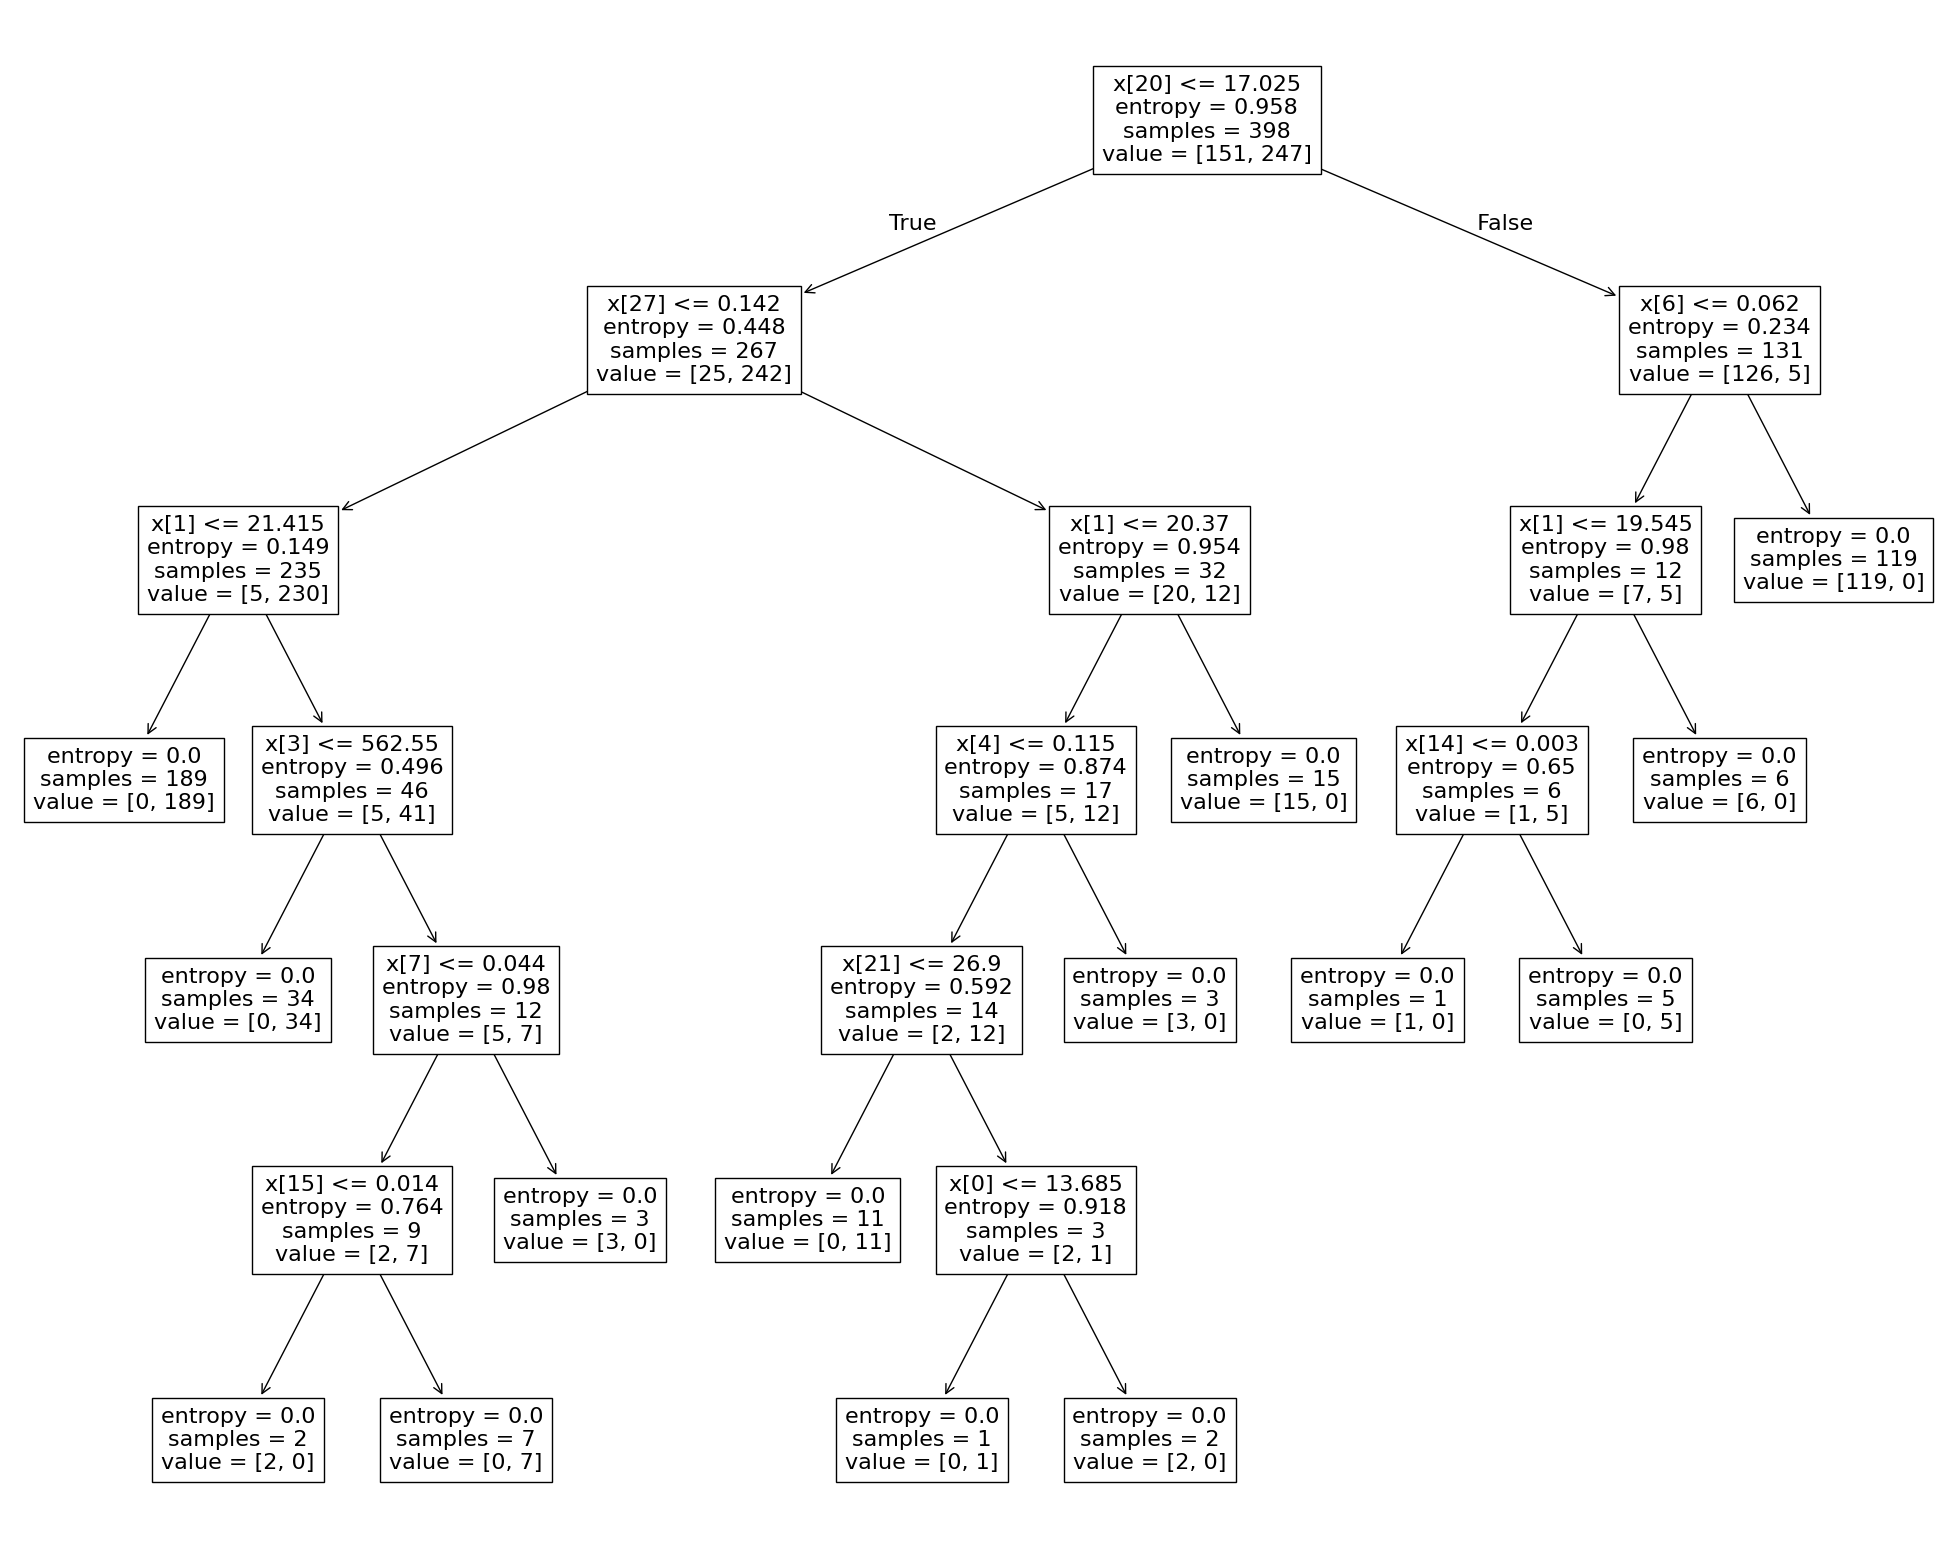

In [77]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)